### Problem Statement:

* Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain. 

In [52]:
pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel("Flight_Fare.xlsx")
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
data.shape

(10683, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data.isnull().sum() # checking null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
# Handling missing values

In [7]:
data.loc[data["Route"].isnull()==True]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
data.loc[data["Total_Stops"].isnull()==True]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
data1=data.dropna(axis=0)  # Only one 1 row contains null value so dropping these 1 row

In [10]:
data1.shape

(10682, 11)

### Handling dates

In [11]:
# Date_of_journey 

In [12]:
data1['Journey_day']=pd.to_datetime(data1.Date_of_Journey).dt.day
data1['Journey_month']=pd.to_datetime(data1.Date_of_Journey).dt.month
data1['Journey_year']=pd.to_datetime(data1.Date_of_Journey).dt.year
data1.drop(['Date_of_Journey'],axis=1,inplace=True)
data1.drop(['Journey_year'],axis=1,inplace=True)

In [13]:
# Handling Duration

In [14]:
duration = list(data1['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [15]:
data1['Duration_Hr']=duration_hours
data1['Duration_Min']=duration_mins

In [16]:
data1.drop(['Duration'],axis = 1,inplace=True)

In [17]:
# Handling deprature time
data1['Dept_hr']=pd.to_datetime(data1.Dep_Time).dt.hour
data1['Dept_min']=pd.to_datetime(data1.Dep_Time).dt.minute
data1.drop(['Dep_Time'],axis=1,inplace=True)

In [18]:
# Handling Arrival time

data1['Arrival_hr']=pd.to_datetime(data1.Arrival_Time).dt.hour
data1['Arrival_min']=pd.to_datetime(data1.Arrival_Time).dt.minute
data1.drop(['Arrival_Time'],axis=1,inplace=True)


In [19]:
data1.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Duration_Hr,Duration_Min,Dept_hr,Dept_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,4,45,16,50,21,35


### Encoding Categorical Data:

In [20]:
# Encoding for Airline 

In [21]:
data1.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

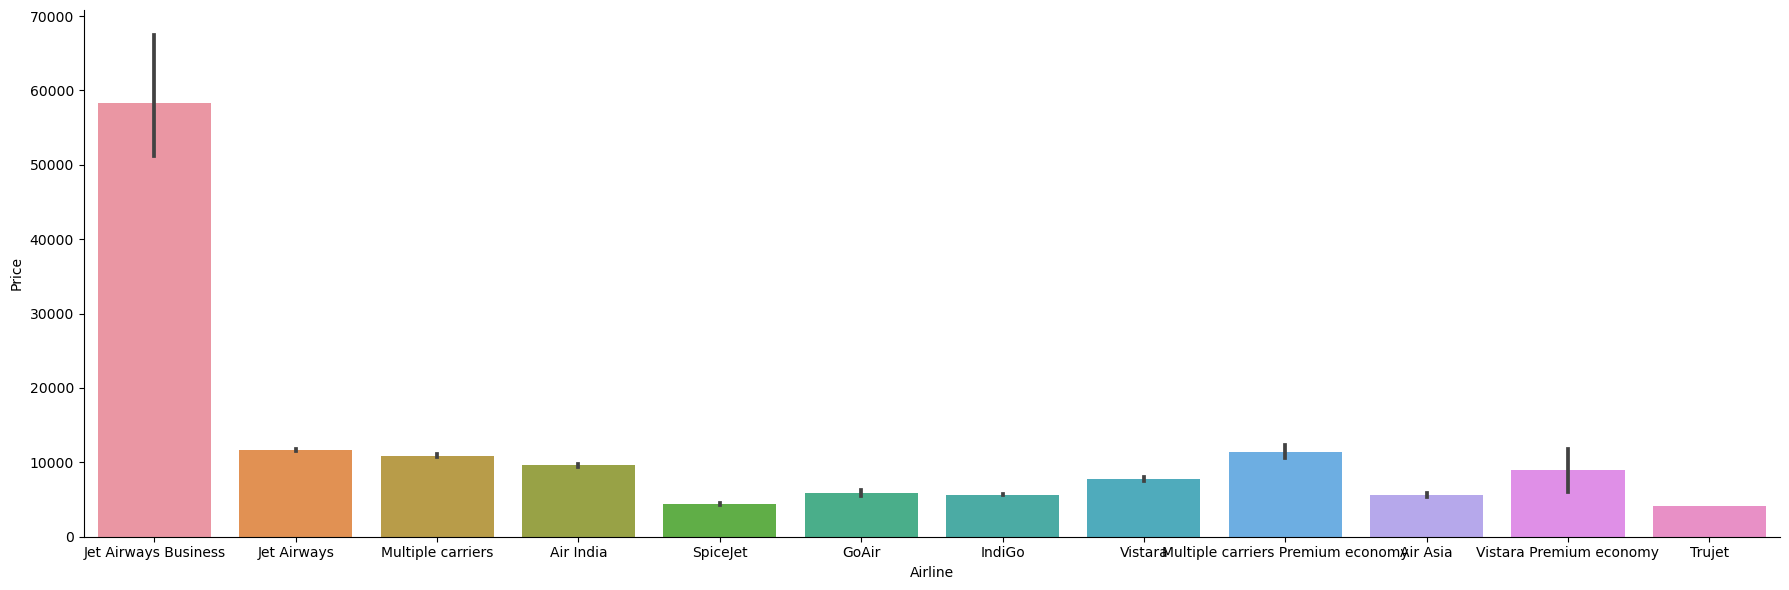

In [22]:
sns.catplot(x="Airline",y="Price",data=data1.sort_values('Price',ascending=False),kind='bar',height=6,aspect=3)

In [23]:
# Label encoding for categroical data numerical data

In [24]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data1.Airline=lc.fit_transform(data1.Airline)

In [25]:
# Encoding for Source

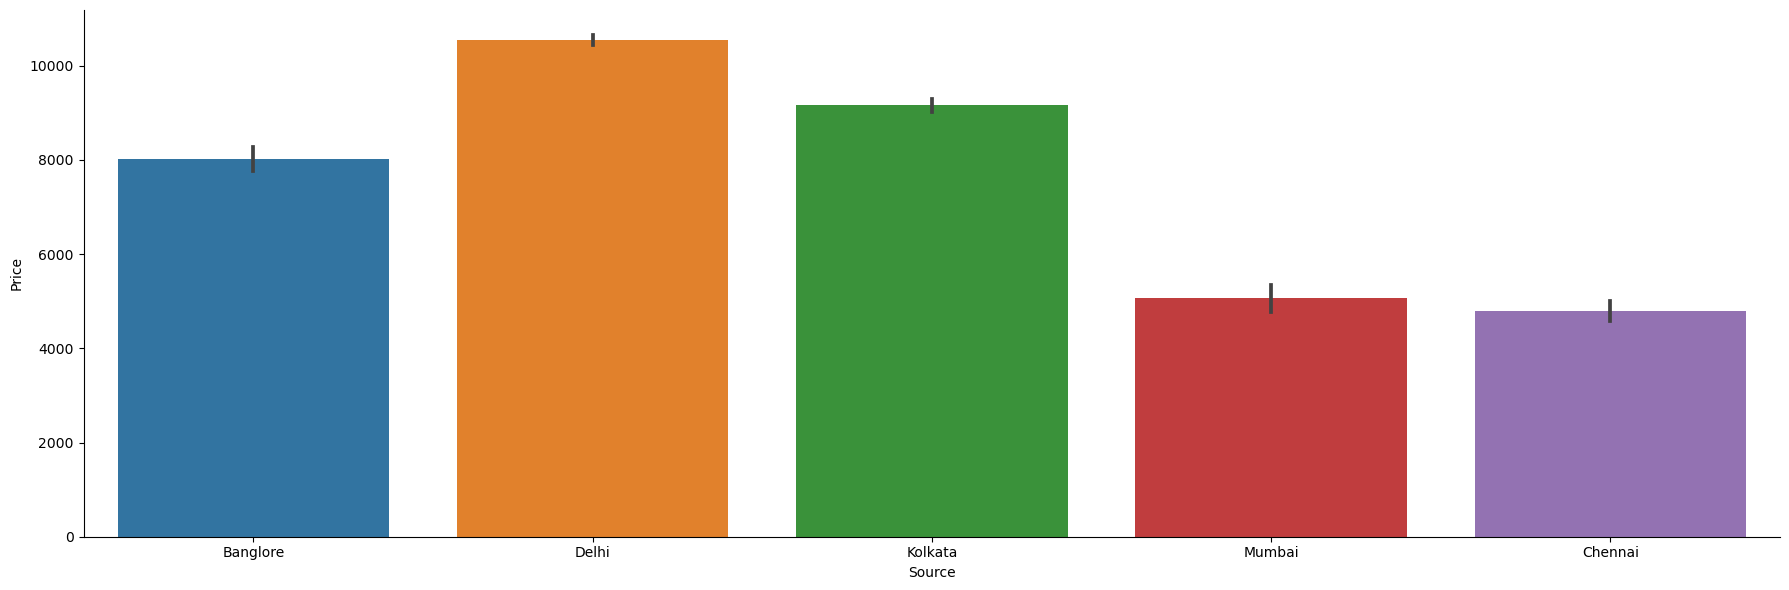

In [26]:
sns.catplot(x="Source",y="Price",data=data1.sort_values('Price',ascending=False),kind='bar',height=6,aspect=3)

In [27]:
data1.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [28]:
data1.Source=lc.fit_transform(data1.Source)

In [29]:
# Encoding for Destination

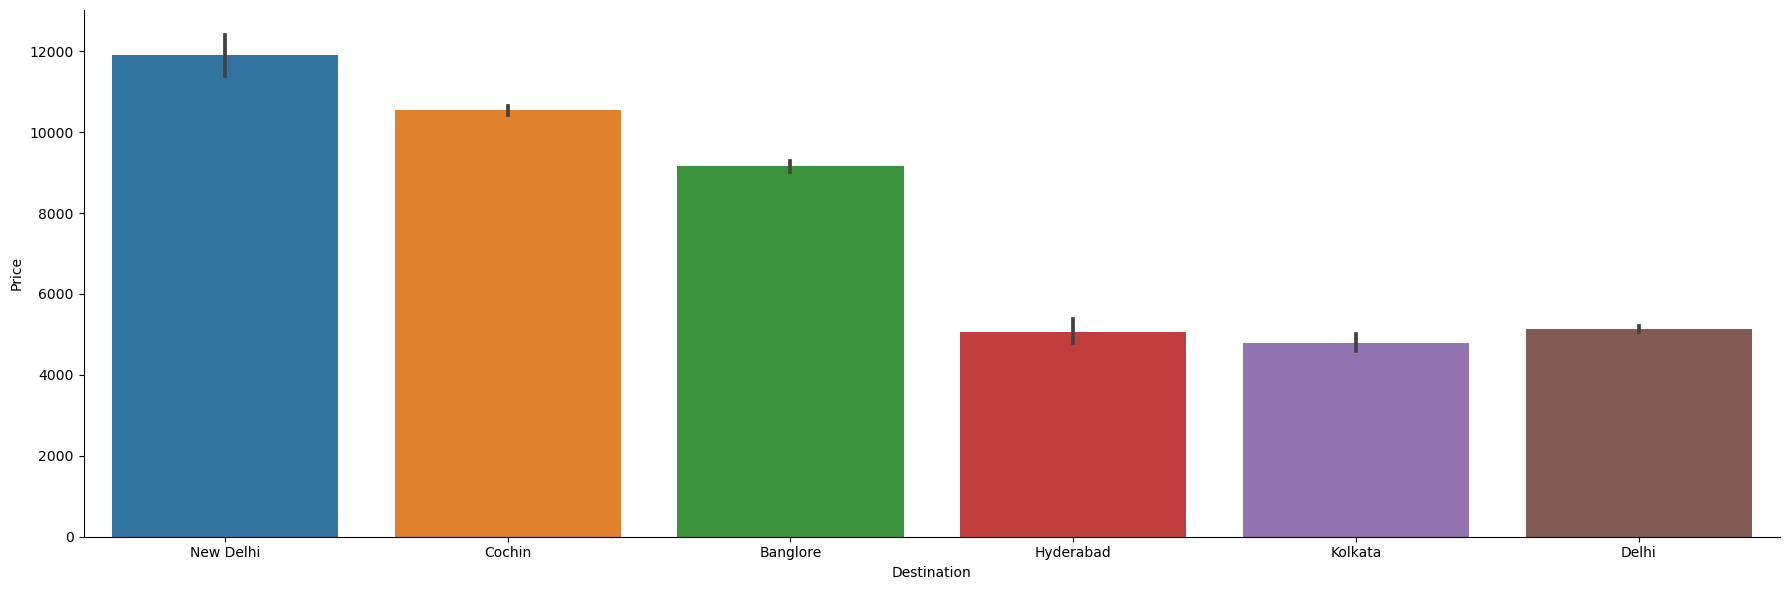

In [30]:
sns.catplot(x="Destination",y="Price",data=data1.sort_values('Price',ascending=False),kind='bar',height=6,aspect=3)

<Axes: xlabel='Destination', ylabel='count'>

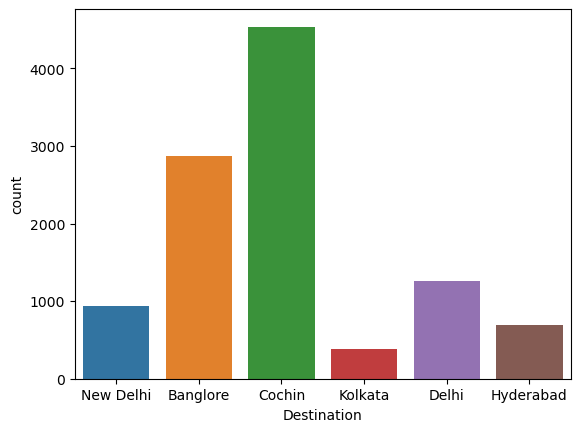

In [31]:
sns.countplot(data=data1,x='Destination')

In [32]:
data1.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [33]:
data1.Destination=lc.fit_transform(data1.Destination)

In [34]:
data1.drop(["Route"],axis=1,inplace=True)
data1.drop(["Additional_Info"],axis=1,inplace=True)

In [35]:
# Encoding for Total_stops

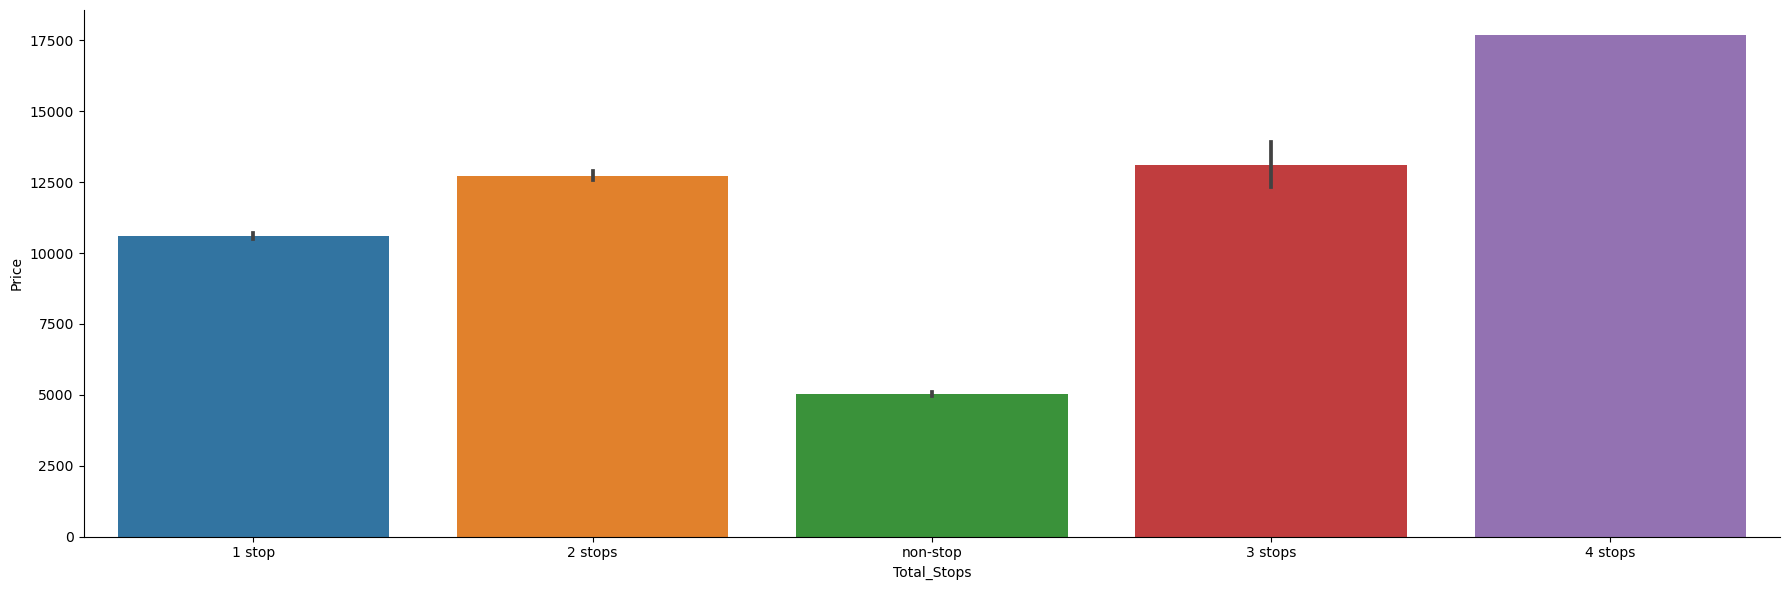

In [36]:
sns.catplot(x="Total_Stops",y="Price",data=data1.sort_values('Price',ascending=False),kind='bar',height=6,aspect=3)

In [37]:
data1.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [38]:
data1.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [39]:
data1.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [40]:
data1.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Duration_Hr,Duration_Min,Dept_hr,Dept_min,Arrival_hr,Arrival_min
0,3,0,5,0,3897,24,3,2,50,22,20,1,10
1,1,3,0,2,7662,5,1,7,25,5,50,13,15
2,4,2,1,2,13882,6,9,19,0,9,25,4,25
3,3,3,0,1,6218,5,12,5,25,18,5,23,30
4,3,0,5,1,13302,3,1,4,45,16,50,21,35


In [41]:
data1.shape

(10682, 13)

In [43]:
data1.shape

(10682, 13)

In [44]:
data1.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Duration_Hr', 'Duration_Min',
       'Dept_hr', 'Dept_min', 'Arrival_hr', 'Arrival_min'],
      dtype='object')

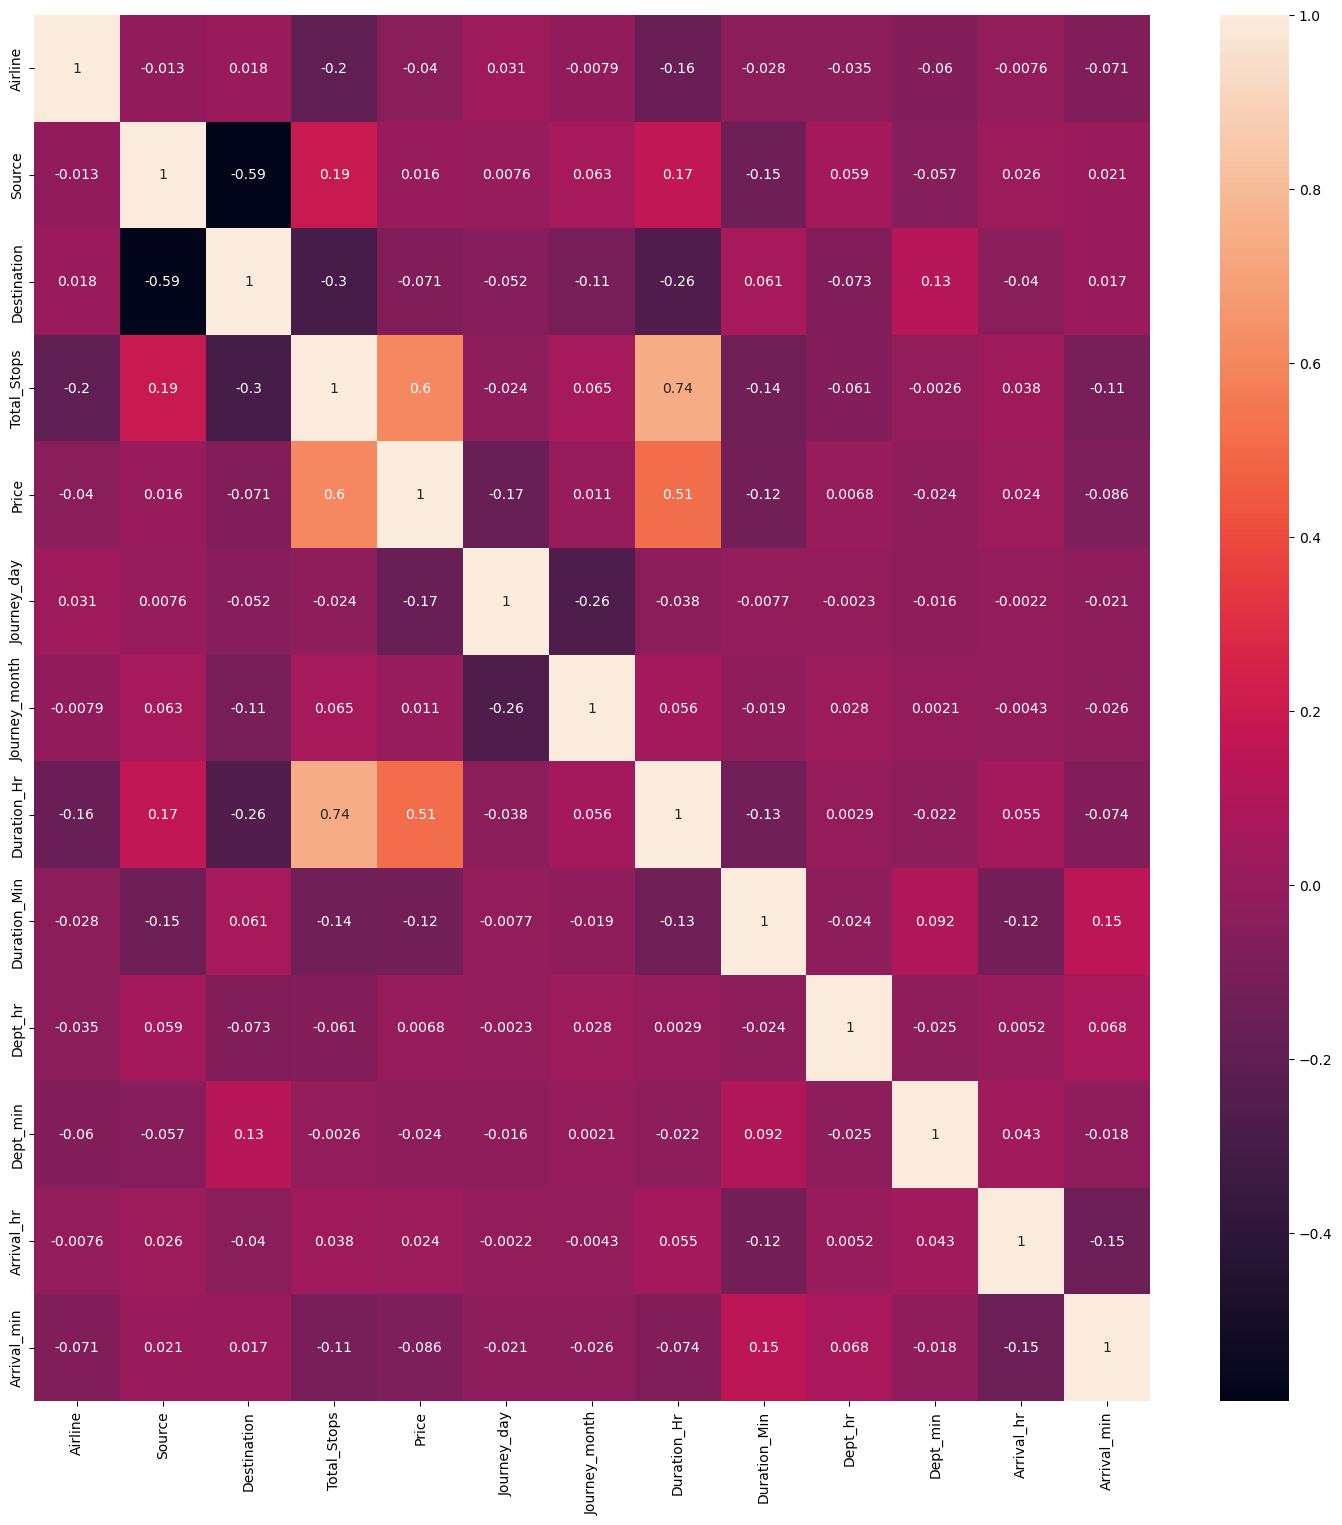

In [45]:
plt.figure(figsize = (18,18))
sns.heatmap(data1.corr(),annot= True)

plt.show()

In [46]:
x=data1.drop(['Price'],axis=1)
y=data1['Price']

### Checking Feature importance

In [47]:
selection =ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [48]:
selection.feature_importances_

array([0.14265528, 0.01935835, 0.04955308, 0.27630786, 0.10952652,
       0.09425466, 0.16936183, 0.02169264, 0.02920441, 0.02710887,
       0.0343361 , 0.02664041])

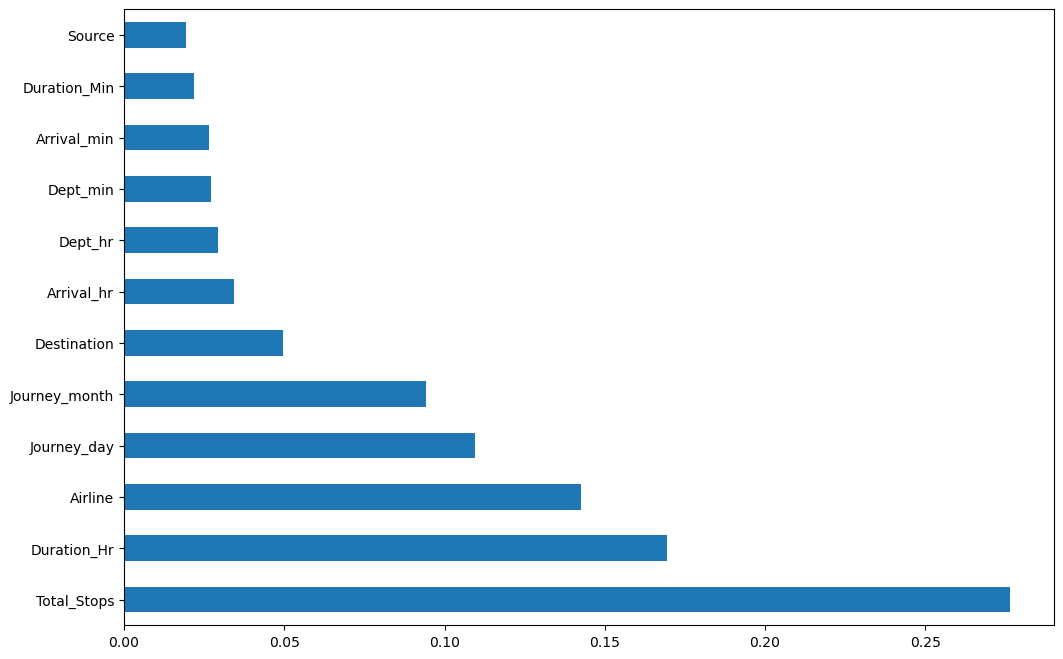

In [49]:
# plotting graph of important features
plt.figure(figsize = (12,8))
feature_importance = pd.Series(selection.feature_importances_,index = x.columns)
feature_importance.nlargest(20).plot(kind="barh")
plt.show()

In [50]:
# Splitting data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


### Model Building

In [51]:
model_list=[LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor(), GradientBoostingRegressor()]


In [52]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
models=[]
MAE=[]
MSE=[]
RMSE=[]
R2_score=[]

for model in model_list:
    models.append(str(model)[0:-2])
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    MAE.append(round(mean_absolute_error(y_test , y_pred) , 2))
    MSE.append(round(mean_squared_error(y_test , y_pred) , 2))
    R2_score.append(round(r2_score(y_test , y_pred) , 2))  

In [53]:
dict={'Model':models,'MAE':MAE,'MSE':MSE,'R2_score':R2_score}

In [54]:
df=pd.DataFrame(dict)
df

,Model,MAE,MSE,R2_score
0,LinearRegression,2416.82,11149392.41,0.45
1,KNeighborsRegressor,1879.49,8201110.86,0.60
2,DecisionTreeRegressor,1367.94,6785167.23,0.67
3,RandomForestRegressor,1228.43,4995913.18,0.76
4,"XGBRegressor(base_score=None, booster=None, ca...",1188.67,3833994.99,0.81
5,GradientBoostingRegressor,1468.86,4235674.23,0.79


### Apply Scaling:

In [55]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [56]:
model_list=[LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor(), GradientBoostingRegressor()]


In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
models=[]
MAE=[]
MSE=[]
RMSE=[]
R2_score=[]

for model in model_list:
    models.append(str(model)[0:-2])
    model.fit(x_train_scaled,y_train)
    y_pred = model.predict(x_test_scaled)
    MAE.append(round(mean_absolute_error(y_test , y_pred) , 2))
    MSE.append(round(mean_squared_error(y_test , y_pred) , 2))
    R2_score.append(round(r2_score(y_test , y_pred) , 2))  

In [58]:
dict={'Model':models,'MAE':MAE,'MSE':MSE,'R2_score':R2_score}

In [59]:
df1=pd.DataFrame(dict)
df1

,Model,MAE,MSE,R2_score
0,LinearRegression,2416.82,11149392.41,0.45
1,KNeighborsRegressor,1676.11,6047824.13,0.70
2,DecisionTreeRegressor,1371.98,6732826.84,0.67
3,RandomForestRegressor,1222.33,4778034.02,0.77
4,"XGBRegressor(base_score=None, booster=None, ca...",1188.67,3833994.99,0.81
5,GradientBoostingRegressor,1468.86,4235674.23,0.79


In [76]:
# After applying scaling techniques on regression model only Kneighbour and Random forest R2 score improved.
# Compare to other models XGboost regressor R2 score is high.

### Hyperparameter tuning

In [68]:
# Randomized searchCv for XGBoostRegressor
xgb_param={'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01,0.03,0.05, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

In [69]:
xgb = XGBRegressor(seed = 20)

In [70]:
xgb_random = RandomizedSearchCV(estimator=xgb,param_distributions=xgb_param, scoring='neg_mean_squared_error',
                         n_iter=25,verbose=1)

In [71]:
xgb_random.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=25,
                   param_distributions={'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.2, 0.3],
                                        'max_depth': [3, 5, 6, 10, 15, 20],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='neg_mean_squared_error', verbose=1)

In [72]:
xgb_random.best_params_

{'subsample': 0.7,
 'n_estimators': 1000,
 'max_depth': 6,
 'learning_rate': 0.01,
 'colsample_bytree': 0.5,
 'colsample_bylevel': 0.8999999999999999}

In [73]:
xgb1=XGBRegressor(subsample= 0.7,
 n_estimators= 1000,
 max_depth=6,
 learning_rate=0.01,
 colsample_bytree= 0.5,
 colsample_bylevel=0.8999999999999999)
xgb1.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.8999999999999999, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [74]:
pred=xgb1.predict(x_test)

In [75]:
r2_score(y_test,pred)

0.839587089008869

In [77]:
# XGBoost Regressor gives more accuracy which is 83%.